<a href="https://colab.research.google.com/github/bhertzberg/StarShotSims/blob/main/Radioactive_Decay_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def microDC(lam, totalTime):      #lamdba emissions per second, totalTime in seconds
  arrive = np.random.exponential(1/lam) #first arrival time of a DC, following a radioactive emmission rate of lambda counts per second
  microSec = arrive * 1000000 - 1   #convert arrive time to milliseconds, subtract 1 to allow spot for DC
  microSec = np.trunc(microSec) 
  dc = [['counts', 'DC Val']]
  dc.append([microSec, 0])      # microSec is time in microseconds since last DC
  dc.append([microSec+1, 1])    # 0 for no DC, 1 for DC
  timePassed = arrive
  while timePassed<totalTime:          #generate DC for 10 seconds
    arrive = np.random.exponential(1/lam)   #generate time until next DC
    microSec = arrive * 1000000 - 1
    microSec = np.trunc(microSec)
    timePassed += arrive
    if timePassed < totalTime:
      dc.append([microSec, 0])      #add new DC to the array
      dc.append([microSec+1, 1])
  return dc

In [ ]:
dc = microDC(2,10)

In [ ]:
dc

[['counts', 'DC Val'],
 [491444.0, 0],
 [491445.0, 1],
 [891038.0, 0],
 [891039.0, 1],
 [252030.0, 0],
 [252031.0, 1],
 [37069.0, 0],
 [37070.0, 1],
 [139353.0, 0],
 [139354.0, 1],
 [447884.0, 0],
 [447885.0, 1],
 [132563.0, 0],
 [132564.0, 1],
 [387131.0, 0],
 [387132.0, 1],
 [255529.0, 0],
 [255530.0, 1],
 [102134.0, 0],
 [102135.0, 1],
 [106863.0, 0],
 [106864.0, 1],
 [37899.0, 0],
 [37900.0, 1],
 [539644.0, 0],
 [539645.0, 1],
 [91551.0, 0],
 [91552.0, 1],
 [437360.0, 0],
 [437361.0, 1],
 [2186394.0, 0],
 [2186395.0, 1],
 [207773.0, 0],
 [207774.0, 1],
 [127735.0, 0],
 [127736.0, 1],
 [199094.0, 0],
 [199095.0, 1],
 [44792.0, 0],
 [44793.0, 1],
 [995951.0, 0],
 [995952.0, 1],
 [1261426.0, 0],
 [1261427.0, 1]]

In [ ]:
def decodeDCList(dcList):
  decodeDC = []
  for i in range(1,len(dcList), 2):
    for j in range(int(dcList[i][0])):  #read in the counts for the 0 DC val rows
      decodeDC.append(0)                #add that number of 0s, followed by a single 1 (representing 1 DC)
    decodeDC.append(1)
  while len(decodeDC)<10000000:         #add 0s until 10 sec is reached
    decodeDC.append(0)
  return decodeDC

In [ ]:
decodedDC = decodeDCList(dc)

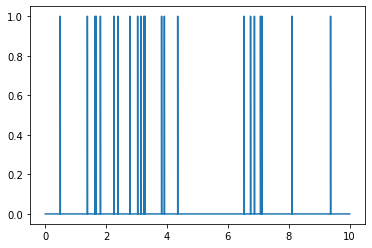

In [ ]:
x3=np.linspace(0, len(decodedDC)/1000000, len(decodedDC))   #divide length by million to convert to seconds
plt.plot(x3, decodedDC)